# House Prices - Advanced Regression Techniques

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('trainhouse.csv')
test = pd.read_csv('testhouse.csv')

Read data:

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


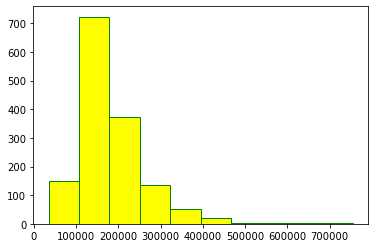

In [ ]:
plt.hist(train['SalePrice'],bins=10,edgecolor='green',facecolor='yellow');


In [ ]:
X = pd.DataFrame(train.loc[:, train.columns != 'SalePrice'])

In [ ]:
X = pd.concat([X, test], axis=0)

In [ ]:
y = pd.DataFrame(train['SalePrice'])

In [ ]:
import missingno as msno
%matplotlib inline

Plotting missing data with missingno

<AxesSubplot:>

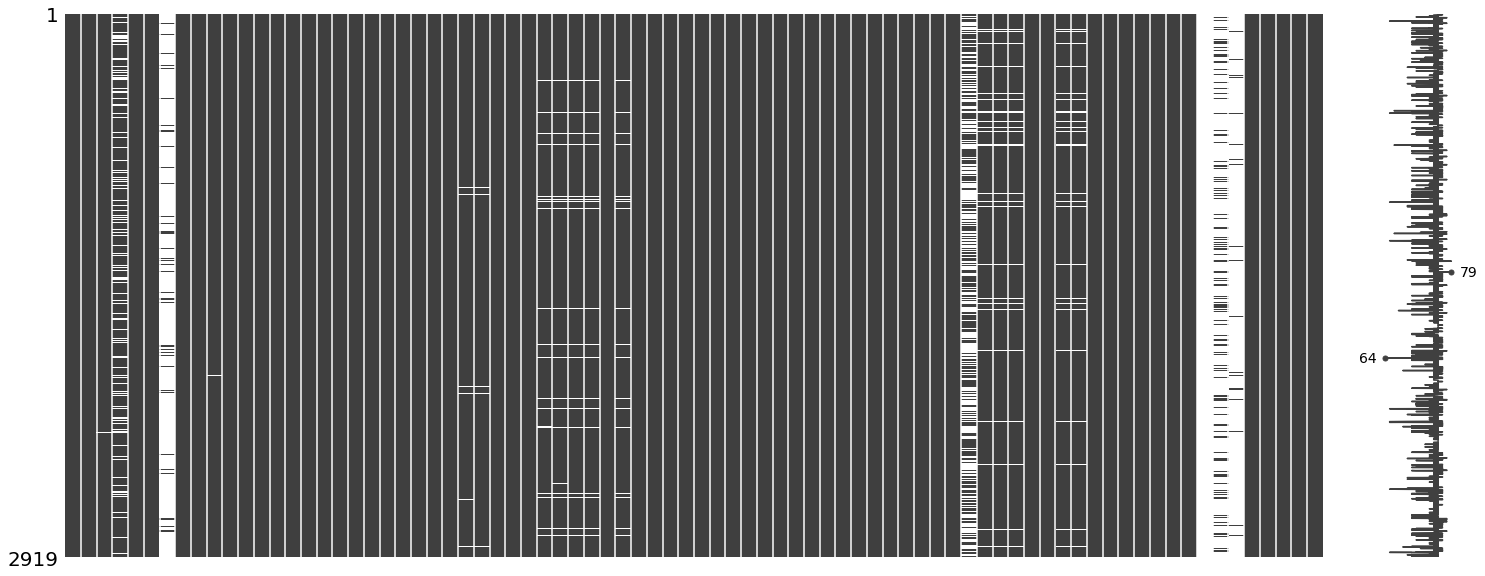

In [ ]:
msno.matrix(X)

Vs. Heatmap

<AxesSubplot:>

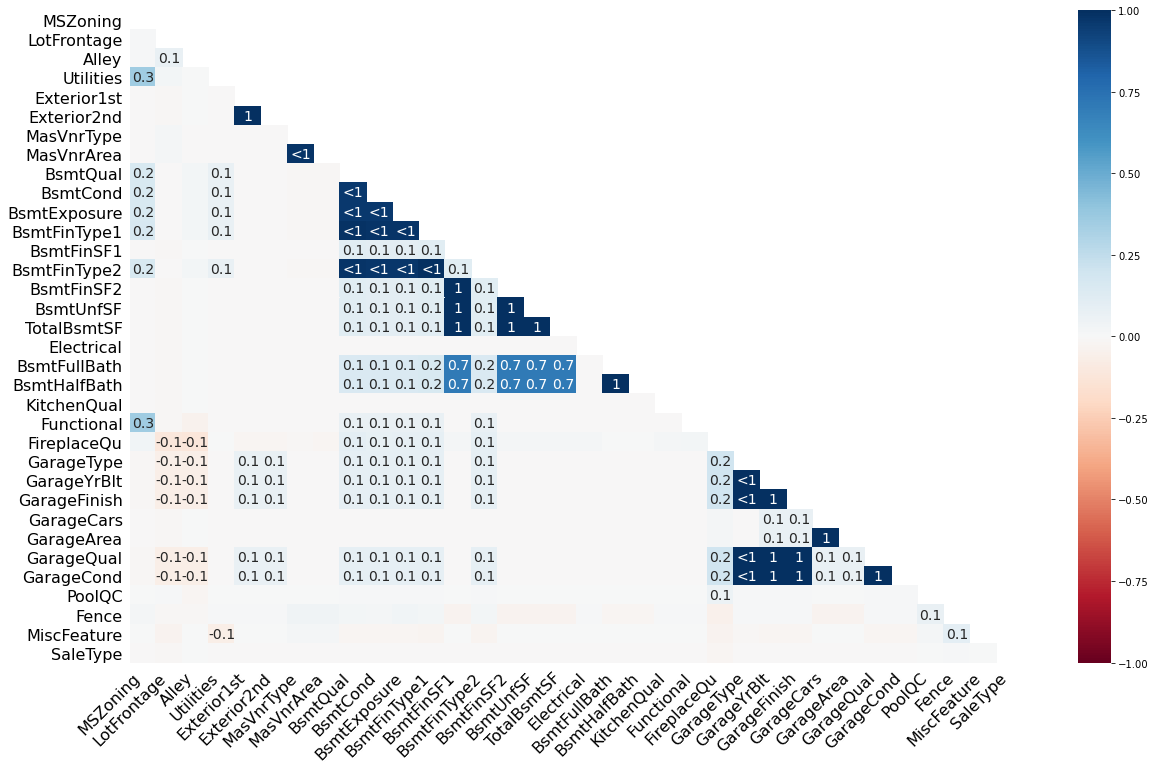

In [ ]:
msno.heatmap(X)

In [ ]:
X.isnull().sum().sum()

13965

As you can see there are quite a few missing data from many different columns. 

<AxesSubplot:>

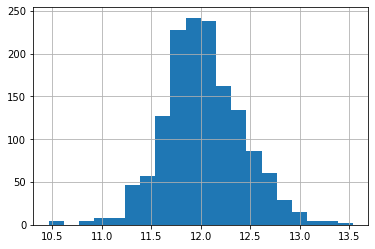

In [ ]:
#I am also going to show data with matplotib

(np.log(y['SalePrice'])).hist(bins=20)

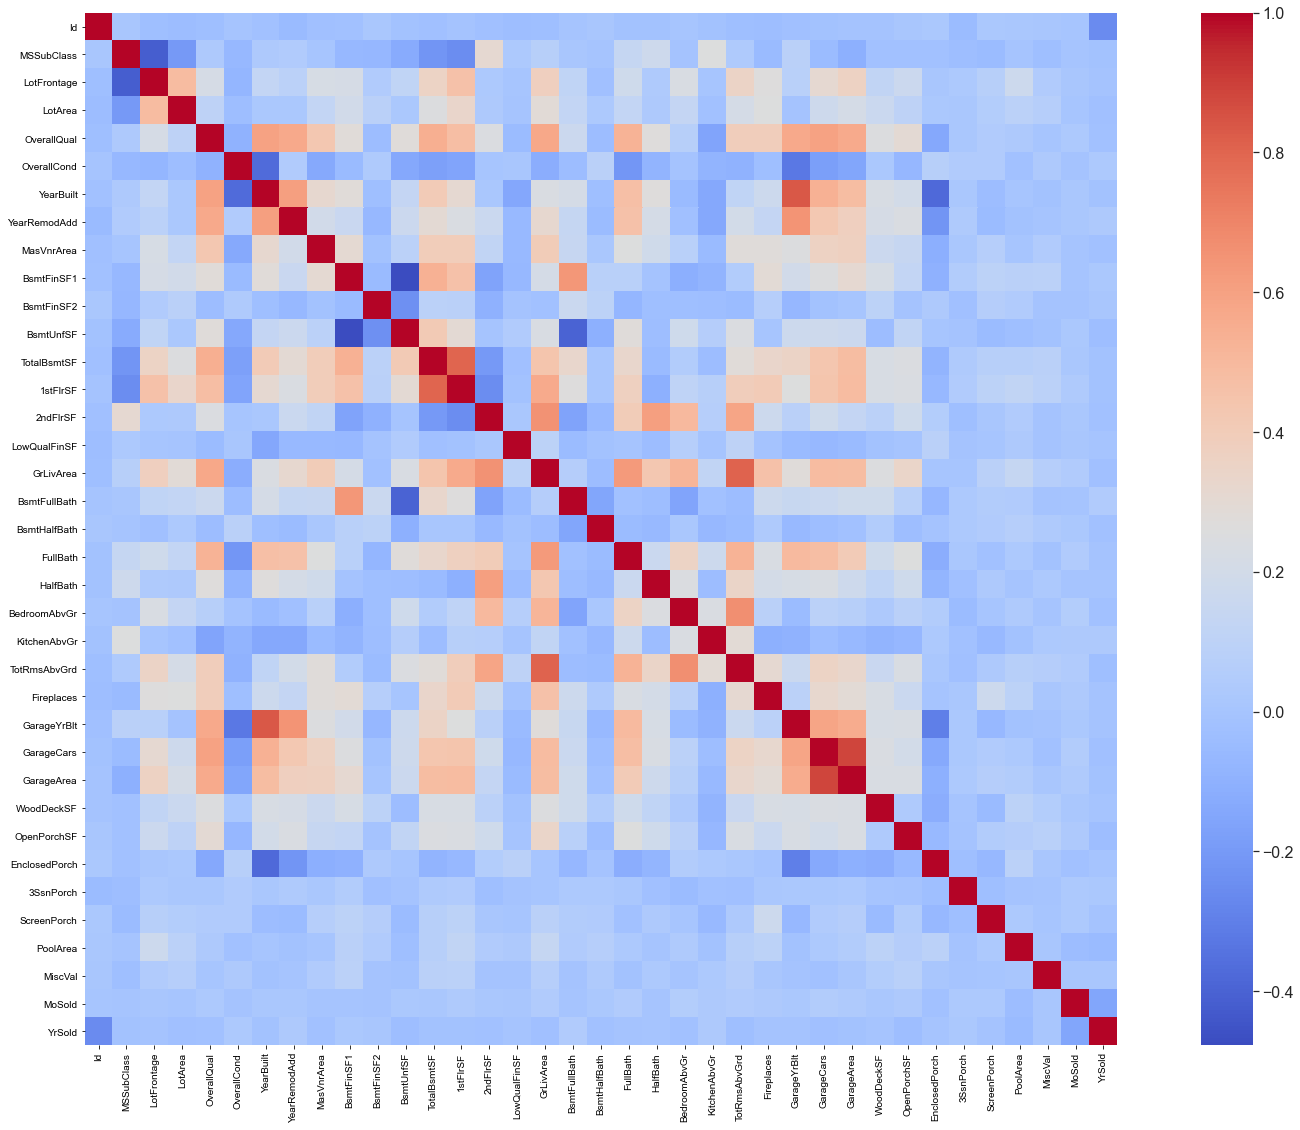

In [1082]:
# # Turning this into a correlation matrix
# corrmat = X.corr()

# #Now I am plotting a heatmap to visualize the correlations in the data
# f, ax = plt.subplots(figsize=(30, 19))
# sns.set(font_scale=1.45)
# sns.heatmap(corrmat, square=True,cmap='coolwarm');

Data Cleaning

In [1083]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [1084]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [1085]:
X.LotFrontage.isnull().sum().sum()

486

In [1086]:
X.Functional

0       Typ
1       Typ
2       Typ
3       Typ
4       Typ
       ... 
1454    Typ
1455    Typ
1456    Typ
1457    Typ
1458    Typ
Name: Functional, Length: 2919, dtype: object

In [1087]:
X['Functional'].isnull().sum().sum()

2

In [1088]:
X['Functional'].fillna('Typ', inplace=True)

In [1089]:
X['Electrical'].isnull().sum().sum()

1

In [1090]:
X['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
Name: Electrical, Length: 2919, dtype: object

In [1091]:
X['Electrical'].fillna('SBrkr', inplace=True)

In [1092]:
X['Electrical'].isnull().sum().sum()

0

In [1093]:
X['KitchenQual']

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: KitchenQual, Length: 2919, dtype: object

In [1094]:
X['KitchenQual'].fillna('TA', inplace=True)

In [1095]:
X['KitchenQual'].isnull().sum().sum()

0

In [1096]:
X['Exterior1st'].fillna(X['Exterior1st'].mode()[0], inplace=True)

In [1097]:
X['Exterior1st'].isnull().sum().sum()

0

In [1098]:
X['Exterior2nd'].isnull().sum().sum()

1

In [1099]:
X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0], inplace=True)

In [1100]:
X['SaleType'].fillna(X['SaleType'].mode()[0], inplace=True)

In [1101]:
X['PoolQC'].fillna('No', inplace=True)

In [1102]:
X['PoolQC'].isnull().sum().sum()

0

In [1103]:
X['Alley'].fillna('No', inplace=True)

In [1104]:
X['Alley'].isnull().sum().sum()

0

In [1105]:
X['Alley'].isnull().sum()

0

In [1106]:
X['FireplaceQu'].fillna('No', inplace=True)

In [1107]:
X['FireplaceQu'].isnull().sum()

0

In [1108]:
X['Fence'].fillna('No', inplace=True)

In [1109]:
X['MiscFeature'].fillna('No', inplace=True)

In [1110]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2'):
  X[col] = X[col].fillna('No')

In [1111]:
for col in ('GarageType', 'GarageFinish','GarageQual','GarageCond'):
  X[col] = X[col].fillna('No')

In [1112]:
for col in ('GarageArea', 'GarageCars'):
  X[col] = X[col].fillna(0)

In [1113]:
X.isnull().sum().sum()

706

In [1114]:
X.fillna(X.median(), inplace=True)

In [1115]:
X['MSZoning'].fillna(X['MSZoning'].mode()[0], inplace=True)

In [1116]:
X['Utilities'].fillna(X['Utilities'].mode()[0], inplace=True)

In [1117]:
X.isnull().sum().sum()

24

In [1120]:
X['MasVnrType'].fillna(X['MasVnrType'].mode()[0], inplace=True)

In [1121]:
X.isnull().sum().sum()

0

Feature Engineering

In [1122]:
X['AllSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

In [1123]:
X['AllSF']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
1454    1638.0
1455    1638.0
1456    2448.0
1457    1882.0
1458    2996.0
Name: AllSF, Length: 2919, dtype: float64

In [1124]:
X['BackyardSF'] = X['LotArea'] - X['1stFlrSF']

In [1125]:
X['PorchSF'] = X['WoodDeckSF'] + X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']

In [1126]:
X['Total_Bathrooms'] = X['FullBath'] + X['BsmtFullBath'] + (.5 * X['HalfBath']) + (.5 * X['BsmtHalfBath'])

In [1127]:
X['MedNhbdArea']= X.groupby('Neighborhood')['GrLivArea'].transform('median')

In [1128]:
X['IsAbvGr'] = X[['MedNhbdArea', 'GrLivArea']].apply(lambda x: 'yes' if x['GrLivArea'] > x['MedNhbdArea'] else 'no', axis=1)

Scaling Encoding Transforming

In [1129]:
scale = ['MedNhbdArea', 'BackyardSF', 'PorchSF', 'WoodDeckSF', 'OpenPorchSF','AllSF', '1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','GarageArea','GrLivArea','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','TotalBsmtSF','PoolArea']

In [1130]:
encode = list(set(X.columns) - set(scale) - set(['Id']))

In [1131]:
skew_feats = X[scale].skew().sort_values(ascending=False)

In [1132]:
skewness = pd.DataFrame({'Skew':skew_feats.astype('float')})

In [1133]:
skewness

,Skew
PoolArea,16.907017
BackyardSF,13.238317
LotArea,12.829025
LowQualFinSF,12.094977
BsmtFinSF2,4.148275
MasVnrArea,2.614936
OpenPorchSF,2.536417
WoodDeckSF,1.843380
LotFrontage,1.675713
AllSF,1.516515


In [1134]:
skewness = skewness[(skewness.Skew > .75)]

In [1135]:
skewness

,Skew
PoolArea,16.907017
BackyardSF,13.238317
LotArea,12.829025
LowQualFinSF,12.094977
BsmtFinSF2,4.148275
MasVnrArea,2.614936
OpenPorchSF,2.536417
WoodDeckSF,1.843380
LotFrontage,1.675713
AllSF,1.516515


In [1136]:
indeces = list(skewness.index)

In [1137]:
for x in indeces:
  X[x] = np.log1p(X[x])

In [1138]:
Xscale = X[scale]

In [1139]:
scaler = MinMaxScaler().fit(Xscale)

In [1140]:
Xscale = pd.DataFrame(scaler.transform(Xscale), columns = Xscale.columns)

In [1141]:
Xscale

,MedNhbdArea,BackyardSF,PorchSF,WoodDeckSF,OpenPorchSF,AllSF,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GarageArea,GrLivArea,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,TotalBsmtSF,PoolArea
0,0.429416,0.411730,0.568325,0.000000,0.624312,0.572376,0.345070,0.884420,0.759508,0.0,0.646838,0.368280,0.577436,0.366271,0.413268,0.0,0.716038,0.774668,0.0
1,0.581196,0.428215,0.784977,0.784977,0.000000,0.567740,0.487537,0.000000,0.797188,0.0,0.728731,0.309140,0.469935,0.391245,0.490307,0.0,0.000000,0.819153,0.0
2,0.429416,0.466002,0.517934,0.000000,0.568957,0.587303,0.371528,0.886245,0.716357,0.0,0.783246,0.408602,0.592825,0.422289,0.429990,0.0,0.690361,0.782930,0.0
3,0.539281,0.433447,0.789060,0.000000,0.542079,0.562004,0.387529,0.868471,0.622780,0.0,0.811361,0.431452,0.578882,0.390223,0.383633,0.0,0.000000,0.760436,0.0
4,1.000000,0.508107,0.774452,0.724696,0.672040,0.646702,0.451824,0.911832,0.750841,0.0,0.798858,0.561828,0.666289,0.468694,0.508439,0.0,0.794318,0.808002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.044827,0.112290,0.000000,0.000000,0.000000,0.446270,0.180126,0.825906,0.000000,0.0,0.812783,0.000000,0.418744,0.077909,0.000000,0.0,0.000000,0.723166,0.0
2915,0.044827,0.106881,0.443254,0.000000,0.486919,0.446270,0.180126,0.825906,0.640548,0.0,0.733177,0.192204,0.418744,0.073617,0.000000,0.0,0.000000,0.723166,0.0
2916,0.237532,0.571401,0.848716,0.848716,0.000000,0.559149,0.476314,0.000000,0.823138,0.0,0.000000,0.387097,0.459117,0.534906,0.748721,0.0,0.000000,0.815648,0.0
2917,0.237532,0.450689,0.650983,0.605135,0.528917,0.485278,0.390949,0.000000,0.674079,0.0,0.819443,0.000000,0.376835,0.407682,0.395769,0.0,0.000000,0.781929,0.0


In [1142]:
Xencode = X[encode]

In [1143]:
Xencode

,KitchenAbvGr,OverallCond,GarageType,BsmtCond,BedroomAbvGr,Condition1,KitchenQual,MasVnrType,RoofStyle,BldgType,...,GarageYrBlt,ScreenPorch,RoofMatl,Total_Bathrooms,FireplaceQu,Fireplaces,OverallQual,FullBath,LandContour,Functional
0,1,5,Attchd,TA,3,Norm,Gd,BrkFace,Gable,1Fam,...,2003.0,0,CompShg,3.5,No,0,7,2,Lvl,Typ
1,1,8,Attchd,TA,3,Feedr,TA,None,Gable,1Fam,...,1976.0,0,CompShg,2.5,TA,1,6,2,Lvl,Typ
2,1,5,Attchd,TA,3,Norm,Gd,BrkFace,Gable,1Fam,...,2001.0,0,CompShg,3.5,TA,1,7,2,Lvl,Typ
3,1,5,Detchd,Gd,3,Norm,Gd,None,Gable,1Fam,...,1998.0,0,CompShg,2.0,Gd,1,7,1,Lvl,Typ
4,1,5,Attchd,TA,4,Norm,Gd,BrkFace,Gable,1Fam,...,2000.0,0,CompShg,3.5,TA,1,8,2,Lvl,Typ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,7,No,TA,3,Norm,TA,None,Gable,Twnhs,...,1979.0,0,CompShg,1.5,No,0,4,1,Lvl,Typ
1455,1,5,CarPort,TA,3,Norm,TA,None,Gable,TwnhsE,...,1970.0,0,CompShg,1.5,No,0,4,1,Lvl,Typ
1456,1,7,Detchd,TA,4,Norm,TA,None,Gable,1Fam,...,1960.0,0,CompShg,2.0,TA,1,5,1,Lvl,Typ
1457,1,5,No,TA,3,Norm,TA,None,Gable,1Fam,...,1979.0,0,CompShg,1.5,No,0,5,1,Lvl,Typ


In [1144]:
X = Xscale.merge(Xencode.reset_index(), left_index=True, right_index=True)

In [1145]:
X

,MedNhbdArea,BackyardSF,PorchSF,WoodDeckSF,OpenPorchSF,AllSF,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,ScreenPorch,RoofMatl,Total_Bathrooms,FireplaceQu,Fireplaces,OverallQual,FullBath,LandContour,Functional
0,0.429416,0.411730,0.568325,0.000000,0.624312,0.572376,0.345070,0.884420,0.759508,0.0,...,2003.0,0,CompShg,3.5,No,0,7,2,Lvl,Typ
1,0.581196,0.428215,0.784977,0.784977,0.000000,0.567740,0.487537,0.000000,0.797188,0.0,...,1976.0,0,CompShg,2.5,TA,1,6,2,Lvl,Typ
2,0.429416,0.466002,0.517934,0.000000,0.568957,0.587303,0.371528,0.886245,0.716357,0.0,...,2001.0,0,CompShg,3.5,TA,1,7,2,Lvl,Typ
3,0.539281,0.433447,0.789060,0.000000,0.542079,0.562004,0.387529,0.868471,0.622780,0.0,...,1998.0,0,CompShg,2.0,Gd,1,7,1,Lvl,Typ
4,1.000000,0.508107,0.774452,0.724696,0.672040,0.646702,0.451824,0.911832,0.750841,0.0,...,2000.0,0,CompShg,3.5,TA,1,8,2,Lvl,Typ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.044827,0.112290,0.000000,0.000000,0.000000,0.446270,0.180126,0.825906,0.000000,0.0,...,1979.0,0,CompShg,1.5,No,0,4,1,Lvl,Typ
2915,0.044827,0.106881,0.443254,0.000000,0.486919,0.446270,0.180126,0.825906,0.640548,0.0,...,1970.0,0,CompShg,1.5,No,0,4,1,Lvl,Typ
2916,0.237532,0.571401,0.848716,0.848716,0.000000,0.559149,0.476314,0.000000,0.823138,0.0,...,1960.0,0,CompShg,2.0,TA,1,5,1,Lvl,Typ
2917,0.237532,0.450689,0.650983,0.605135,0.528917,0.485278,0.390949,0.000000,0.674079,0.0,...,1979.0,0,CompShg,1.5,No,0,5,1,Lvl,Typ


In [1146]:
X = pd.DataFrame(pd.get_dummies(data=X))

In [1147]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()

In [1148]:
for x in X:
  if X[x].dtype=='object':
    X[x] = oc.fit_transform(X[x].values.reshape(-1,1))

In [1149]:
X

,MedNhbdArea,BackyardSF,PorchSF,WoodDeckSF,OpenPorchSF,AllSF,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,...,LandContour_HLS,LandContour_Low,LandContour_Lvl,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,0.429416,0.411730,0.568325,0.000000,0.624312,0.572376,0.345070,0.884420,0.759508,0.0,...,0,0,1,0,0,0,0,0,0,1
1,0.581196,0.428215,0.784977,0.784977,0.000000,0.567740,0.487537,0.000000,0.797188,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.429416,0.466002,0.517934,0.000000,0.568957,0.587303,0.371528,0.886245,0.716357,0.0,...,0,0,1,0,0,0,0,0,0,1
3,0.539281,0.433447,0.789060,0.000000,0.542079,0.562004,0.387529,0.868471,0.622780,0.0,...,0,0,1,0,0,0,0,0,0,1
4,1.000000,0.508107,0.774452,0.724696,0.672040,0.646702,0.451824,0.911832,0.750841,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.044827,0.112290,0.000000,0.000000,0.000000,0.446270,0.180126,0.825906,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
2915,0.044827,0.106881,0.443254,0.000000,0.486919,0.446270,0.180126,0.825906,0.640548,0.0,...,0,0,1,0,0,0,0,0,0,1
2916,0.237532,0.571401,0.848716,0.848716,0.000000,0.559149,0.476314,0.000000,0.823138,0.0,...,0,0,1,0,0,0,0,0,0,1
2917,0.237532,0.450689,0.650983,0.605135,0.528917,0.485278,0.390949,0.000000,0.674079,0.0,...,0,0,1,0,0,0,0,0,0,1


Split Data: 

In [1150]:
j = X 

In [1151]:
length = test.shape[0]

In [1152]:
X = j[:train.shape[0]]

In [1153]:
test = j[train.shape[0]:test.shape[0]+(length+1)]

In [1154]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=0)

In [1155]:
ytrain = pd.DataFrame(np.log1p(ytrain.SalePrice))

In [1156]:
ytrain.reset_index(inplace=True)

In [1157]:
ytrain.drop(columns='index', inplace=True)

In [1158]:
ytest = pd.DataFrame(np.log1p(ytest.SalePrice))

In [1159]:
ytest.reset_index(inplace=True)

In [1160]:
ytest.drop(columns='index', inplace=True)

XGBoost

In [1209]:
from xgboost import XGBClassifier, XGBRegressor

In [1210]:
model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear', nthread=-1,
                       scale_pos_weight=1, seed=27,
                       reg_alpha=0.00006)


In [1211]:
preds = model.fit(xtrain, ytrain)

In [1212]:
preds = model.predict(xtest)

In [1226]:
preds

array([12.494229 , 11.861534 , 11.64486  , 12.340519 , 11.419797 ,
       11.413288 , 12.44051  , 11.780708 , 13.200213 , 11.944367 ,
       12.192757 , 11.947074 , 12.309112 , 11.756758 , 11.651975 ,
       11.905906 , 12.30709  , 11.706352 , 11.824558 , 12.050762 ,
       11.748152 , 11.974028 , 11.509159 , 11.955582 , 12.1544   ,
       12.090724 , 12.02331  , 11.259615 , 12.542382 , 11.6779585,
       11.847113 , 12.208195 , 11.875051 , 12.629219 , 12.86295  ,
       12.1964445, 12.536593 , 11.760631 , 12.335532 , 12.733045 ,
       12.244309 , 11.671702 , 12.14112  , 12.69096  , 12.895003 ,
       11.84889  , 11.755637 , 11.853574 , 12.071118 , 11.467974 ,
       12.977498 , 11.913811 , 11.999369 , 11.256136 , 12.4603405,
       11.508687 , 11.764589 , 12.347826 , 11.787313 , 11.445971 ,
       11.788531 , 11.788299 , 11.842616 , 11.981035 , 12.239226 ,
       11.943949 , 11.823455 , 12.30593  , 11.854767 , 12.209058 ,
       12.149001 , 11.743674 , 11.21991  , 12.369607 , 11.3433

In [1228]:
np.sqrt(mean_squared_error(np.expm1(ytest), preds))

199500.53730595915

In [1229]:
y = pd.DataFrame(np.log1p(y.SalePrice))

In [1230]:
y.reset_index(inplace=True)

In [1231]:
y.drop(columns='index', inplace=True)

In [1234]:
final_preds = model.predict(test)

In [ ]:
final_preds = np.expm1(final_preds)

In [ ]:
final_preds

array([127040.945, 159970.19 , 184922.23 , ..., 158913.55 , 112636.97 ,
       207310.28 ], dtype=float32)

In [ ]:
new_test  = pd.read_csv('testhouse.csv')

In [ ]:
submission = pd.DataFrame(new_test['Id'], columns=['Id'])

In [ ]:
submission['SalePrice'] = final_preds

In [ ]:
submission

,Id,SalePrice
0,1461,127040.945312
1,1462,159970.187500
2,1463,184922.234375
3,1464,192084.546875
4,1465,187702.734375
...,...,...
1454,2915,80181.445312
1455,2916,83139.335938
1456,2917,158913.546875
1457,2918,112636.968750


In [ ]:
submission.to_csv('submission.csv', index=False, header=True)